In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\ML-DL-Python\APPLE FINANCIAL DATA\apple store numbers.csv')
df

,Region,Country,Country GDP( in Trillions $),Country GDP per Capita(in thousand Dollars),Province/ State,Province/State GDP(in Billion Dollars),Province/States GDP per capita(in thousand $),City,Number of Stores
0,Europe,U.K,3.1,46.2,Scotland,200.0,40.0,Aberdeen,1
1,Europe,U.K,3.1,46.2,Northern Ireland,65.0,34.0,Belfast,1
2,Europe,U.K,3.1,46.2,England,2650.0,47.3,"Reading, Berkshire",1
3,Europe,U.K,3.1,46.2,England,2650.0,47.3,Bristol,2
4,Europe,U.K,3.1,46.2,England,2650.0,47.3,milton keynes,1
...,...,...,...,...,...,...,...,...,...
310,Rest of Asia Pacific,Australia,1.5,57.0,Queensland,NaN,NaN,rabina,1
311,Rest of Asia Pacific,Australia,1.5,57.0,Queensland,NaN,NaN,brisbane,3
312,Rest of Asia Pacific,Australia,1.5,57.0,South Australia,NaN,NaN,adelaide,1
313,Rest of Asia Pacific,Australia,1.5,57.0,Victoria,NaN,NaN,melbourne,5


In [3]:
countries = df['Country'].unique()
countries

array(['U.K', 'U.S', 'UAE', 'Turkiye', 'Thiland', 'china', 'Switzerland',
       'Sweden', 'Spain', 'South Korea', 'Singapore', 'Netherlands',
       'Mexico', 'Japan', 'Italy ', 'Germany', 'France', 'Canada',
       'Brazil', 'Belgium', 'Austria', 'Australia'], dtype=object)

In [4]:
con_gdp = df.loc[df['Country'].isin(countries), ['Country','Region', 'Country GDP( in Trillions $)', 'Country GDP per Capita(in thousand Dollars)']].drop_duplicates(subset='Country').sort_values(by='Country GDP( in Trillions $)', ascending = False)
con_gdp

,Country,Region,Country GDP( in Trillions $),Country GDP per Capita(in thousand Dollars)
29,U.S,Americas,23.00,70.0
198,china,greater china,17.70,11.0
217,Japan,Japan,5.00,40.0
235,Germany,Europe,4.20,50.0
0,U.K,Europe,3.10,46.2
247,France,Europe,3.00,43.0
281,Canada,Americas,2.00,50.0
223,Italy,Europe,2.00,33.0
212,South Korea,Rest of Asia Pacific,1.80,35.0
303,Brazil,Americas,1.60,8.5


GDP of country with applestores 

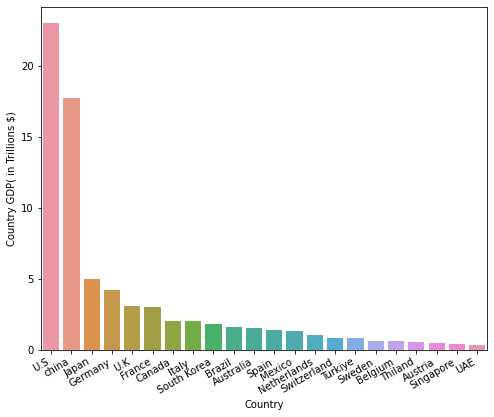

In [5]:
fig = plt.figure(figsize=(8, 7))
ax = plt.axes()
sns.barplot(x = con_gdp['Country'], y= con_gdp['Country GDP( in Trillions $)'])
fig.autofmt_xdate()

If we drop U.S and china as anamolies the stats forGDP of a country that has an apple store will be:

In [6]:
gdp_without_us_china = con_gdp.loc[~con_gdp['Country'].isin(['U.S', 'china']), ['Country', 'Country GDP( in Trillions $)']]
gdp_without_us_china.describe()

,Country GDP( in Trillions $)
count,20.00000
mean,1.62300
std,1.29934
min,0.35000
25%,0.61500
50%,1.35000
75%,2.00000
max,5.00000


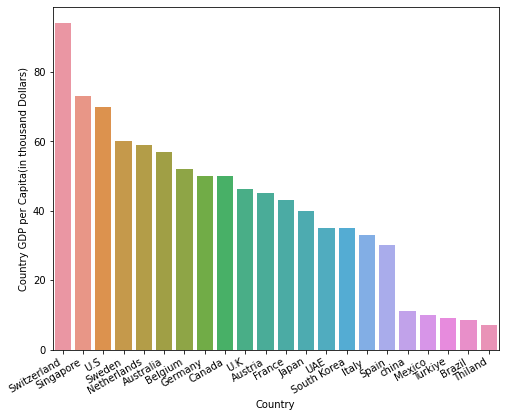

In [7]:
fig = plt.figure(figsize=(8, 7))
ax = plt.axes()
sns.barplot(x = con_gdp.sort_values(by= 'Country GDP per Capita(in thousand Dollars)', ascending= False)['Country'],
                                    y = con_gdp.sort_values(by= 'Country GDP per Capita(in thousand Dollars)', ascending= False)['Country GDP per Capita(in thousand Dollars)'])
fig.autofmt_xdate()

the per capitas are (excluding switzerland as an anamoly)

In [8]:
con_gdp.loc[con_gdp['Country'] != 'Switzerland',  'Country GDP per Capita(in thousand Dollars)'].describe()

count    21.000000
mean     39.223810
std      20.524422
min       7.000000
25%      30.000000
50%      43.000000
75%      52.000000
max      73.000000
Name: Country GDP per Capita(in thousand Dollars), dtype: float64

countries with GDp higher than 10 B$

In [9]:
df3 = pd.read_csv(r'F:\ML-DL-Python\APPLE FINANCIAL DATA\GDP.csv')
df3 = df3.dropna(axis=0)
df3 = df3[df3['2021']>1e10]
df3.sort_values(by='2021')

,Country Name,2021
166,Rwanda,1.107036e+10
135,Mauritius,1.115666e+10
20,"Bahamas, The",1.120860e+10
188,Chad,1.177998e+10
138,Namibia,1.223625e+10
...,...,...
67,United Kingdom,3.190000e+12
49,Germany,4.220000e+12
97,Japan,4.940000e+12
35,China,1.770000e+13


In [10]:
df3.describe()

,2021
count,1.380000e+02
mean,6.777122e+11
std,2.539276e+12
min,1.107036e+10
25%,2.329337e+10
50%,6.950187e+10
75%,3.962500e+11
max,2.300000e+13


countries with higher GDP than the first 25th percentile of countries with apple stores

In [11]:
target_gdp = df3.loc[df3['2021']>6e11]
target_gdp

,Country Name,2021
10,Australia,1.540000e+12
26,Brazil,1.610000e+12
31,Canada,1.990000e+12
32,Switzerland,8.130000e+11
35,China,1.770000e+13
49,Germany,4.220000e+12
58,Spain,1.430000e+12
63,France,2.940000e+12
67,United Kingdom,3.190000e+12
86,Indonesia,1.190000e+12


In [12]:
tar_con = target_gdp['Country Name']
tar_con

10              Australia
26                 Brazil
31                 Canada
32            Switzerland
35                  China
49                Germany
58                  Spain
63                 France
67         United Kingdom
86              Indonesia
88                  India
94                  Italy
97                  Japan
104           Korea, Rep.
124                Mexico
143           Netherlands
155                Poland
165    Russian Federation
167          Saudi Arabia
182                Sweden
197               Turkiye
203         United States
Name: Country Name, dtype: object

four do not have any store:
Indonesia
Russia
Suadi Arabia
Poland

countries with GDP per capita of more than 2000

In [13]:
df4 = pd.read_csv(r'F:\ML-DL-Python\APPLE FINANCIAL DATA\GDP per capita.csv')
df4 = df4.dropna(axis=0)
df4.sort_values(by='2021')
df4 = df4.loc[df4['2021']> 2000]
df4

,Country Name,2021
2,Angola,2137.909393
3,Albania,6494.385713
4,Andorra,43047.686270
6,Argentina,10729.232580
7,Armenia,4670.008798
...,...,...
206,Vietnam,3694.019046
207,Vanuatu,3127.446248
208,Samoa,3939.113696
209,Kosovo,4986.582469


In [14]:
df4.loc[(df4['2021'] > 30000)]

,Country Name,2021
4,Andorra,43047.68627
9,Australia,59934.12941
10,Austria,53267.93275
13,Belgium,51767.78857
23,Bermuda,110869.46310
27,Brunei Darussalam,31722.66014
30,Canada,52051.35146
31,Switzerland,93457.44040
46,Cyprus,30798.47656
48,Germany,50801.78671


countries that have higher GDP and GDP per capita than first 25th percentile of countries with apple store

In [15]:
finall_con_GDP_based = df4.loc[(df4['Country Name'].isin(tar_con)) & (df4['2021'] > 30000)]
finall_con_GDP_based

,Country Name,2021
9,Australia,59934.12941
30,Canada,52051.35146
31,Switzerland,93457.44040
48,Germany,50801.78671
57,Spain,30115.70589
62,France,43518.53851
66,United Kingdom,47334.35531
92,Italy,35551.28499
95,Japan,39285.16311
102,"Korea, Rep.",34757.72007


so even based on the lowest standards of GDP alone there remain No country for opening a new apple store
but what about the ratio of stores to GDP in each country?
are there countries that are underserved? is there any country with the potential of a first store?

In [16]:
con_gdp['number of stores'] = np.nan
con_gdp

,Country,Region,Country GDP( in Trillions $),Country GDP per Capita(in thousand Dollars),number of stores
29,U.S,Americas,23.00,70.0,NaN
198,china,greater china,17.70,11.0,NaN
217,Japan,Japan,5.00,40.0,NaN
235,Germany,Europe,4.20,50.0,NaN
0,U.K,Europe,3.10,46.2,NaN
247,France,Europe,3.00,43.0,NaN
281,Canada,Americas,2.00,50.0,NaN
223,Italy,Europe,2.00,33.0,NaN
212,South Korea,Rest of Asia Pacific,1.80,35.0,NaN
303,Brazil,Americas,1.60,8.5,NaN


In [17]:
for cont in con_gdp['Country']:
    con_gdp.loc[con_gdp['Country']== cont, 'number of stores'] = df.loc[df['Country']==cont, 'Number of Stores'].sum()
con_gdp

,Country,Region,Country GDP( in Trillions $),Country GDP per Capita(in thousand Dollars),number of stores
29,U.S,Americas,23.00,70.0,270.0
198,china,greater china,17.70,11.0,55.0
217,Japan,Japan,5.00,40.0,10.0
235,Germany,Europe,4.20,50.0,16.0
0,U.K,Europe,3.10,46.2,39.0
247,France,Europe,3.00,43.0,20.0
281,Canada,Americas,2.00,50.0,28.0
223,Italy,Europe,2.00,33.0,16.0
212,South Korea,Rest of Asia Pacific,1.80,35.0,3.0
303,Brazil,Americas,1.60,8.5,2.0


In [18]:
con_gdp['gdp store ratio'] = con_gdp['Country GDP( in Trillions $)']/ con_gdp['number of stores']
con_gdp['gdp per capita store ratio'] = con_gdp['Country GDP per Capita(in thousand Dollars)']/con_gdp['number of stores'] 
con_gdp

,Country,Region,Country GDP( in Trillions $),Country GDP per Capita(in thousand Dollars),number of stores,gdp store ratio,gdp per capita store ratio
29,U.S,Americas,23.00,70.0,270.0,0.085185,0.259259
198,china,greater china,17.70,11.0,55.0,0.321818,0.200000
217,Japan,Japan,5.00,40.0,10.0,0.500000,4.000000
235,Germany,Europe,4.20,50.0,16.0,0.262500,3.125000
0,U.K,Europe,3.10,46.2,39.0,0.079487,1.184615
247,France,Europe,3.00,43.0,20.0,0.150000,2.150000
281,Canada,Americas,2.00,50.0,28.0,0.071429,1.785714
223,Italy,Europe,2.00,33.0,16.0,0.125000,2.062500
212,South Korea,Rest of Asia Pacific,1.80,35.0,3.0,0.600000,11.666667
303,Brazil,Americas,1.60,8.5,2.0,0.800000,4.250000


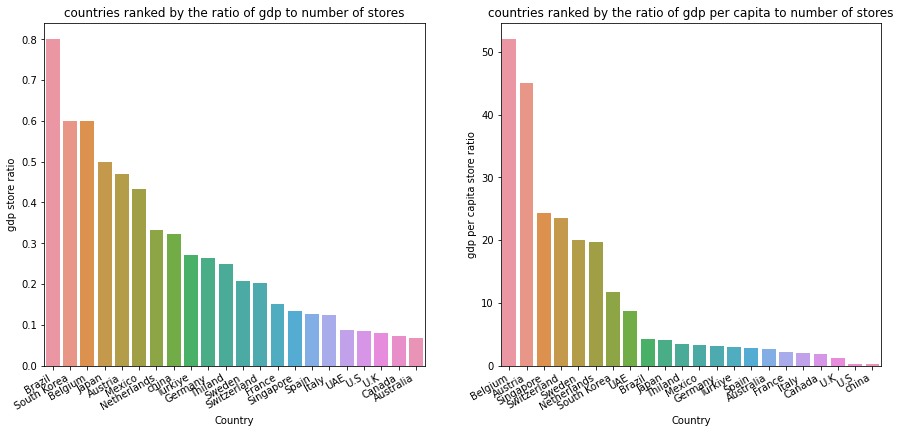

In [19]:
con_gdp = con_gdp.sort_values(by='gdp store ratio', ascending= False)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot(ax =ax[0], x= con_gdp['Country'], y= con_gdp['gdp store ratio'])
ax[0].set_title('countries ranked by the ratio of gdp to number of stores')
con_gdp = con_gdp.sort_values(by='gdp per capita store ratio', ascending= False)
sns.barplot(ax =ax[1],x= con_gdp['Country'], y= con_gdp['gdp per capita store ratio'])
ax[1].set_title('countries ranked by the ratio of gdp per capita to number of stores')
fig.autofmt_xdate()

Now it is clearly obvious that countries like South korea, Brazil, and Japan have potential for more stores 
P.S: some other countries are not included because despite the charts showing on GDP datas they are either two small or have one or two concentrated population center which already has an apple store.

In [20]:
con_gdp.describe()

,Country GDP( in Trillions $),Country GDP per Capita(in thousand Dollars),number of stores,gdp store ratio,gdp per capita store ratio
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,3.325455,41.713636,23.590909,0.280797,10.867512
std,5.706136,23.185675,56.778315,0.205846,14.439473
min,0.350000,7.000000,1.000000,0.068182,0.200000
25%,0.667500,30.750000,3.000000,0.125568,2.260227
50%,1.450000,44.000000,4.000000,0.228333,3.416667
75%,2.750000,55.750000,19.000000,0.408333,17.666667
max,23.000000,94.000000,270.000000,0.800000,52.000000


now we can see that the ratio of GDP for a store in the first quarter is 120 B$

In [26]:
ratio_based_tar_con = df3.loc[df3['2021'] > 1.2e11]
ratio_based_tar_con
new_tar_con = ratio_based_tar_con.loc[(~ratio_based_tar_con['Country Name'].isin(finall_con_GDP_based['Country Name'])) &
                                     (~ratio_based_tar_con['Country Name'].isin(countries))]

In [27]:
new_tar_con

,Country Name,2021
6,Argentina,4.910000e+11
17,Bangladesh,4.160000e+11
34,Chile,3.170000e+11
35,China,1.770000e+13
40,Colombia,3.140000e+11
48,Czech Republic,2.820000e+11
52,Denmark,3.970000e+11
54,Algeria,1.680000e+11
56,"Egypt, Arab Rep.",4.040000e+11
61,Finland,2.990000e+11


In [39]:
new_tar_con.drop(new_tar_con[new_tar_con['Country Name'].isin(['Thailand', 'Hong Kong SAR, China', 'China'])].index, inplace = True)
new_tar_con

C:\Users\Windows 10-1703 ASUS\AppData\Local\Temp\ipykernel_7268\2909414194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tar_con.drop(new_tar_con[new_tar_con['Country Name'].isin(['Thailand', 'Hong Kong SAR, China', 'China'])].index, inplace = True)


,Country Name,2021
6,Argentina,4.910000e+11
17,Bangladesh,4.160000e+11
34,Chile,3.170000e+11
40,Colombia,3.140000e+11
48,Czech Republic,2.820000e+11
52,Denmark,3.970000e+11
54,Algeria,1.680000e+11
56,"Egypt, Arab Rep.",4.040000e+11
61,Finland,2.990000e+11
75,Greece,2.160000e+11


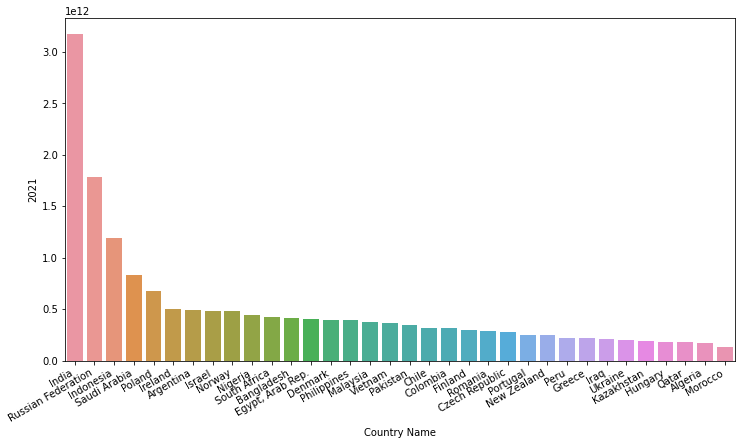

In [44]:
new_tar_con = new_tar_con.sort_values(by='2021', ascending= False)
fig = plt.figure(figsize=(12, 7))
ax = plt.axes()
sns.barplot(x = new_tar_con['Country Name'], y= new_tar_con['2021'] )
fig.autofmt_xdate()

So our top five target countries would be : India, Indonasia, Saudi Arabia, Poland, and Argentina
ps: Russia is escluded due to the war in Ukraine and the dismal state of its rlationship with west
P.S.2 = Irland is excluded because its gdp is heavily skewed and is not an actual representation of the countries econimic standing( due to virtually non-existent corporate tax
                                                                                                                                   many big companies register in Irland which increases the GDP significantly and artificially
                                                                                                                                   , although that might be changing becuase of the newly negotiated 15 percent minimum tax to be applied in all OECD countries)